In [1]:
from __future__ import print_function, division
from sympy import init_printing
from sympy.printing.codeprinter import CodePrinter
from sympy.printing.precedence import precedence
from sympy.printing.str import StrPrinter
from sympy import *
import ast
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
#init_session()

In [3]:
name = "free_energy_def.dat"
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)

In [4]:
name = "ML_parameter.dat" #load n_conv, con_dim,kill (killsmall)
tmp = open(name, "r")
tmp=tmp.read()
exec(tmp)
kill=float(kill)
print(n_parameter,conv_dim,n_conv,kill)

1 513 4 0.05


In [5]:
name = "assign_symbols_final.dat"
tmp = open(name, "r")
tmp=tmp.read()
tmp=tmp.replace("eps0","epsilon0")
tmp=tmp.replace("sepsilon0","seps0")

exec(tmp)

In [6]:
tmp

"sa1L0, sa1L1, sa1L10, sa1L11, sa1L12, sa1L13, sa1L14, sa1L15, sa1L16, sa1L17, sa1L18, sa1L19, sa1L2, sa1L20, sa1L21, sa1L22, sa1L23, sa1L24, sa1L25, sa1L26, sa1L27, sa1L28, sa1L29, sa1L3, sa1L30, sa1L31, sa1L32, sa1L33, sa1L34, sa1L35, sa1L4, sa1L5, sa1L6, sa1L7, sa1L8, sa1L9, sa2L10, sa2L11, sa2L15, sa2L16, sa2L17, sa2L18, sa2L19, sa2L20, sa2L21, sa2L22, sa2L23, sa2L24, sa2L25, sa2L26, sa2L27, sa2L28, sa2L29, sa2L3, sa2L30, sa2L31, sa2L32, sa2L33, sa2L34, sa2L35, sa2L36, sa2L37, sa2L38, sa2L39, sa2L4, sa2L40, sa2L41, sa2L42, sa2L43, sa2L44, sa2L45, sa2L46, sa2L47, sa2L48, sa2L49, sa2L5, sa2L50, sa2L51, sa2L52, sa2L53, sa2L9, seps0, sn0, sn1, sn2, sn3=symbols('a1L0, a1L1, a1L10, a1L11, a1L12, a1L13, a1L14, a1L15, a1L16, a1L17, a1L18, a1L19, a1L2, a1L20, a1L21, a1L22, a1L23, a1L24, a1L25, a1L26, a1L27, a1L28, a1L29, a1L3, a1L30, a1L31, a1L32, a1L33, a1L34, a1L35, a1L4, a1L5, a1L6, a1L7, a1L8, a1L9, a2L10, a2L11, a2L15, a2L16, a2L17, a2L18, a2L19, a2L20, a2L21, a2L22, a2L23, a2L24, a2L2

In [7]:
fed_eqn

<function __main__.fed_eqn>

In [8]:
name = "fed_latex.dat"
tmp = open(name, "w")
tmp_string = str(latex(fed_eqn())).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()
#tmp.write(str(latex(fed_eqn(syms))).replace("epsilon_{0}","epsilon"))

In [9]:
#latex(fed_eqn(syms))

In [10]:
# Used in MCodePrinter._print_Function(self)
known_functions = {
    "exp": [(lambda x: True, "Exp")],
    "log": [(lambda x: True, "Log")],
    "sin": [(lambda x: True, "Sin")],
    "cos": [(lambda x: True, "Cos")],
    "tan": [(lambda x: True, "Tan")],
    "cot": [(lambda x: True, "Cot")],
    "asin": [(lambda x: True, "ArcSin")],
    "acos": [(lambda x: True, "ArcCos")],
    "atan": [(lambda x: True, "ArcTan")],
    "sinh": [(lambda x: True, "Sinh")],
    "cosh": [(lambda x: True, "Cosh")],
    "tanh": [(lambda x: True, "Tanh")],
    "coth": [(lambda x: True, "Coth")],
    "sech": [(lambda x: True, "Sech")],
    "csch": [(lambda x: True, "Csch")],
    "asinh": [(lambda x: True, "ArcSinh")],
    "acosh": [(lambda x: True, "ArcCosh")],
    "atanh": [(lambda x: True, "ArcTanh")],
    "acoth": [(lambda x: True, "ArcCoth")],
    "asech": [(lambda x: True, "ArcSech")],
    "acsch": [(lambda x: True, "ArcCsch")],
    "conjugate": [(lambda x: True, "Conjugate")],
    "Max": [(lambda *x: True, "Max")],
    "Min": [(lambda *x: True, "Min")],
}



In [11]:

class MCodePrinter(CodePrinter):
    """A printer to convert python expressions to
    strings of the Wolfram's Mathematica code
    """
    printmethod = "_mcode"
    language = "Wolfram Language"

    _default_settings = {
        'order': None,
        'full_prec': 'auto',
        'precision': 15,
        'user_functions': {},
        'human': True,
        'allow_unknown_functions': False,
    }

    _number_symbols = set()
    _not_supported = set()

    def __init__(self, settings={}):
        """Register function mappings supplied by user"""
        CodePrinter.__init__(self, settings)
        self.known_functions = dict(known_functions)
        userfuncs = settings.get('user_functions', {}).copy()
        for k, v in userfuncs.items():
            if not isinstance(v, list):
                userfuncs[k] = [(lambda *x: True, v)]
        self.known_functions.update(userfuncs)

    def _format_code(self, lines):
        return lines

    def _print_Pow(self, expr):
        PREC = precedence(expr)
        return '%s^%s' % (self.parenthesize(expr.base, PREC),
                          self.parenthesize(expr.exp, PREC))

    def _print_Mul(self, expr):
        PREC = precedence(expr)
        c, nc = expr.args_cnc()
        res = super(MCodePrinter, self)._print_Mul(expr.func(*c))
        if nc:
            res += '*'
            res += '**'.join(self.parenthesize(a, PREC) for a in nc)
        return res


    # Primitive numbers
    def _print_Zero(self, expr):
        return '0'

    def _print_One(self, expr):
        return '1'

    def _print_NegativeOne(self, expr):
        return '-1'

    def _print_half(self, expr):
        return '1/2'

    def _print_ImaginaryUnit(self, expr):
        return 'I'


    # Infinity and invalid numbers
    def _print_Infinity(self, expr):
        return 'Infinity'

    def _print_NegativeInfinity(self, expr):
        return '-Infinity'

    def _print_ComplexInfinity(self, expr):
        return 'ComplexInfinity'

    def _print_NaN(self, expr):
        return 'Indeterminate'


    # Mathematical constants
    def _print_Exp1(self, expr):
        return 'E'

    def _print_Pi(self, expr):
        return 'Pi'

    def _print_GoldenRatio(self, expr):
        return 'GoldenRatio'

    def _print_TribonacciConstant(self, expr):
        return self.doprint(expr._eval_expand_func())

    def _print_EulerGamma(self, expr):
        return 'EulerGamma'

    def _print_Catalan(self, expr):
        return 'Catalan'


    def _print_list(self, expr):
        return '{' + ', '.join(self.doprint(a) for a in expr) + '}'
    _print_tuple = _print_list
    _print_Tuple = _print_list

    def _print_ImmutableDenseMatrix(self, expr):
        return self.doprint(expr.tolist())

    def _print_ImmutableSparseMatrix(self, expr):
        from sympy.core.compatibility import default_sort_key

        def print_rule(pos, val):
            return '{} -> {}'.format(
            self.doprint((pos[0]+1, pos[1]+1)), self.doprint(val))

        def print_data():
            items = sorted(expr._smat.items(), key=default_sort_key)
            return '{' + \
                ', '.join(print_rule(k, v) for k, v in items) + \
                '}'

        def print_dims():
            return self.doprint(expr.shape)

        return 'SparseArray[{}, {}]'.format(print_data(), print_dims())

    def _print_ImmutableDenseNDimArray(self, expr):
        return self.doprint(expr.tolist())

    def _print_ImmutableSparseNDimArray(self, expr):
        def print_string_list(string_list):
            return '{' + ', '.join(a for a in string_list) + '}'

        def to_mathematica_index(*args):
            """Helper function to change Python style indexing to
            Pathematica indexing.

            Python indexing (0, 1 ... n-1)
            -> Mathematica indexing (1, 2 ... n)
            """
            return tuple(i + 1 for i in args)

        def print_rule(pos, val):
            """Helper function to print a rule of Mathematica"""
            return '{} -> {}'.format(self.doprint(pos), self.doprint(val))

        def print_data():
            """Helper function to print data part of Mathematica
            sparse array.

            It uses the fourth notation ``SparseArray[data,{d1,d2,...}]``
            from
            https://reference.wolfram.com/language/ref/SparseArray.html

            ``data`` must be formatted with rule.
            """
            return print_string_list(
                [print_rule(
                    to_mathematica_index(*(expr._get_tuple_index(key))),
                    value)
                for key, value in sorted(expr._sparse_array.items())]
            )

        def print_dims():
            """Helper function to print dimensions part of Mathematica
            sparse array.

            It uses the fourth notation ``SparseArray[data,{d1,d2,...}]``
            from
            https://reference.wolfram.com/language/ref/SparseArray.html
            """
            return self.doprint(expr.shape)

        return 'SparseArray[{}, {}]'.format(print_data(), print_dims())

    def _print_Function(self, expr):
        if expr.func.__name__ in self.known_functions:
            cond_mfunc = self.known_functions[expr.func.__name__]
            for cond, mfunc in cond_mfunc:
                if cond(*expr.args):
                    return "%s[%s]" % (mfunc, self.stringify(expr.args, ", "))
        return expr.func.__name__ + "[%s]" % self.stringify(expr.args, ", ")

    _print_MinMaxBase = _print_Function

    def _print_Integral(self, expr):
        if len(expr.variables) == 1 and not expr.limits[0][1:]:
            args = [expr.args[0], expr.variables[0]]
        else:
            args = expr.args
        return "Hold[Integrate[" + ', '.join(self.doprint(a) for a in args) + "]]"

    def _print_Sum(self, expr):
        return "Hold[Sum[" + ', '.join(self.doprint(a) for a in expr.args) + "]]"

    def _print_Derivative(self, expr):
        dexpr = expr.expr
        dvars = [i[0] if i[1] == 1 else i for i in expr.variable_count]
        return "Hold[D[" + ', '.join(self.doprint(a) for a in [dexpr] + dvars) + "]]"


    def _get_comment(self, text):
        return "(* {} *)".format(text)



In [12]:
def mathematica_code(expr, **settings):
    r"""Converts an expr to a string of the Wolfram Mathematica code

    Examples
    ========

    >>> from sympy import mathematica_code as mcode, symbols, sin
    >>> x = symbols('x')
    >>> mcode(sin(x).series(x).removeO())
    '(1/120)*x^5 - 1/6*x^3 + x'
    """
    return MCodePrinter(settings).doprint(expr)

In [13]:
mathematica_code(fed_eqn())

'a2L3*(a1L12*n0 + a1L13*n1 + a1L14*n2 + a1L15*epsilon0*n3)*(a1L16*n0 + a1L17*n1 + a1L18*n2 + a1L19*epsilon0*n3) + a2L4*(a1L20*n0 + a1L21*n1 + a1L22*n2 + a1L23*epsilon0*n3)*(a1L24*n0 + a1L25*n1 + a1L26*n2 + a1L27*epsilon0*n3) + a2L5*(a1L28*n0 + a1L29*n1 + a1L30*n2 + a1L31*epsilon0*n3)/(a1L32*n0 + a1L33*n1 + a1L34*n2 + a1L35*epsilon0*n3 + 1) + (a2L18*(a1L0*n0 + a1L1*n1 + a1L2*n2 + a1L3*epsilon0*n3) + a2L19*(Exp[a1L4*n0 + a1L5*n1 + a1L6*n2 + a1L7*epsilon0*n3] - 1) + a2L20*Log[a1L10*n2 + a1L11*epsilon0*n3 + a1L8*n0 + a1L9*n1 + 1] + a2L21*(a1L12*n0 + a1L13*n1 + a1L14*n2 + a1L15*epsilon0*n3)*(a1L16*n0 + a1L17*n1 + a1L18*n2 + a1L19*epsilon0*n3) + a2L22*(a1L20*n0 + a1L21*n1 + a1L22*n2 + a1L23*epsilon0*n3)*(a1L24*n0 + a1L25*n1 + a1L26*n2 + a1L27*epsilon0*n3) + a2L23*(a1L28*n0 + a1L29*n1 + a1L30*n2 + a1L31*epsilon0*n3)/(a1L32*n0 + a1L33*n1 + a1L34*n2 + a1L35*epsilon0*n3 + 1))*(a2L24*(a1L0*n0 + a1L1*n1 + a1L2*n2 + a1L3*epsilon0*n3) + a2L25*(Exp[a1L4*n0 + a1L5*n1 + a1L6*n2 + a1L7*epsilon0*n3] - 1)

In [14]:

name = "all_parameter.dat"
tmp = open(name, "r")
tmp=tmp.read()
#print(tmp)
tmp=tmp.replace("/varible:0",":")
tmp=tmp.replace("/const_1:0",":")

for i in range(100):
    tmp=tmp.replace("_"+str(i),"")
tmp=tmp.replace("[[","")
tmp=tmp.replace("]]","")
tmp=tmp.replace("\n",",")
tmp=tmp.replace(":","\":")
tmp=tmp.replace(",",",\"")
tmp="{\""+tmp+"}"
tmp=tmp.replace(",\"}","}")
#print(tmp)
dict_all=ast.literal_eval(tmp)

In [15]:
for i in list(dict_all.keys()):
    if(np.abs(dict_all[i])<kill):
        dict_all[i]=0
    #dict_all[i]=np.round(dict_all[i],3)

In [16]:
fed_eqn().subs(dict_all)

-0.5505477*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*epsilon0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2)*(-0.48827153890566*epsilon0*n3 - 0.102425521623679*n0 - 0.0960028092023862*n1 - 0.525453200074944*n2 + 0.24892256*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*epsilon0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2) - 0.2448266*(0.0632784*epsilon0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.39168647*n2)*(0.12526949*epsilon0*n3 + 0.2187326*n0 + 0.15640846*n1 - 0.26057413*n2) - 0.38916522*(-0.97701424*epsilon0*n3 - 0.5044318*n0 - 0.08790455*n1 - 1.0639597*n2)/(-0.3635221*epsilon0*n3 - 1.1627965*n1 + 1)) - 0.09906254*(0.15196347*n0 - 0.39830536*n1 + 0.11997815*n2)*(0.4507714*epsilon0*n3 - 0.27385*n0 - 0.38018966*n1 + 0.3314684*n2) - 0.20664054*(0.0632784*epsilon0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.39168647*n2)*(0.12526949*epsilon0*n3 + 0.2187326*n0 + 0.15640846*n1 - 0.26057413*n2) - 0.050811*(0.0632784*epsilon0*n3 + 0.15260038*n0 - 0.29205367*n1 - 0.3

In [17]:
name = "fed_latex_number.dat"
tmp = open(name, "w")
tmp_string = str(latex(fed_eqn().subs(dict_all))).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()

In [18]:
eqn = fed_eqn().subs(dict_all)
eqn2=eqn
for a in preorder_traversal(eqn):
    if isinstance(a, Float):
        eqn2 = eqn2.subs(a, round(a, 1))
name = "fed_latex_number.dat"
tmp = open(name, "w")
tmp_string = str(latex(nsimplify(eqn2/seps0))).replace("epsilon_{0}","epsilon")
tmp.write(tmp_string)
tmp.close()

In [19]:
mathematica_code(nsimplify(eqn2).subs("epsilon0","epsilon"))

'-3/5*((1/5)*n0 - 2/5*n1 + (1/10)*n2)*((1/2)*epsilon*n3 - 3/10*n0 - 2/5*n1 + (3/10)*n2)*(-1/2*epsilon*n3 - 1/10*n0 - 1/10*n1 - 1/2*n2 + (1/5)*((1/5)*n0 - 2/5*n1 + (1/10)*n2)*((1/2)*epsilon*n3 - 3/10*n0 - 2/5*n1 + (3/10)*n2) - 1/5*((1/10)*epsilon*n3 + (1/5)*n0 - 3/10*n1 - 2/5*n2)*((1/10)*epsilon*n3 + (1/5)*n0 + (1/5)*n1 - 3/10*n2) - 2/5*(-epsilon*n3 - 1/2*n0 - 1/10*n1 - 11/10*n2)/(-2/5*epsilon*n3 - 6/5*n1 + 1)) - 1/10*((1/5)*n0 - 2/5*n1 + (1/10)*n2)*((1/2)*epsilon*n3 - 3/10*n0 - 2/5*n1 + (3/10)*n2) - 1/5*((1/10)*epsilon*n3 + (1/5)*n0 - 3/10*n1 - 2/5*n2)*((1/10)*epsilon*n3 + (1/5)*n0 + (1/5)*n1 - 3/10*n2) - 1/10*((1/10)*epsilon*n3 + (1/5)*n0 - 3/10*n1 - 2/5*n2)*((1/10)*epsilon*n3 + (1/5)*n0 + (1/5)*n1 - 3/10*n2)/((1/5)*epsilon*n3 + (1/5)*n2 - 7/10*((1/5)*n0 - 2/5*n1 + (1/10)*n2)*((1/2)*epsilon*n3 - 3/10*n0 - 2/5*n1 + (3/10)*n2) + (3/5)*((1/10)*epsilon*n3 + (1/5)*n0 - 3/10*n1 - 2/5*n2)*((1/10)*epsilon*n3 + (1/5)*n0 + (1/5)*n1 - 3/10*n2) - 2/5*Log[-3/10*epsilon*n3 + (1/10)*n2 + 1] + 1 - 1/

In [20]:
nsimplify(eqn2)

-3*(n0/5 - 2*n1/5 + n2/10)*(epsilon0*n3/2 - 3*n0/10 - 2*n1/5 + 3*n2/10)*(-epsilon0*n3/2 - n0/10 - n1/10 - n2/2 + (n0/5 - 2*n1/5 + n2/10)*(epsilon0*n3/2 - 3*n0/10 - 2*n1/5 + 3*n2/10)/5 - (epsilon0*n3/10 + n0/5 - 3*n1/10 - 2*n2/5)*(epsilon0*n3/10 + n0/5 + n1/5 - 3*n2/10)/5 - 2*(-epsilon0*n3 - n0/2 - n1/10 - 11*n2/10)/(5*(-2*epsilon0*n3/5 - 6*n1/5 + 1)))/5 - (n0/5 - 2*n1/5 + n2/10)*(epsilon0*n3/2 - 3*n0/10 - 2*n1/5 + 3*n2/10)/10 - (epsilon0*n3/10 + n0/5 - 3*n1/10 - 2*n2/5)*(epsilon0*n3/10 + n0/5 + n1/5 - 3*n2/10)/5 - (epsilon0*n3/10 + n0/5 - 3*n1/10 - 2*n2/5)*(epsilon0*n3/10 + n0/5 + n1/5 - 3*n2/10)/(10*(epsilon0*n3/5 + n2/5 - 7*(n0/5 - 2*n1/5 + n2/10)*(epsilon0*n3/2 - 3*n0/10 - 2*n1/5 + 3*n2/10)/10 + 3*(epsilon0*n3/10 + n0/5 - 3*n1/10 - 2*n2/5)*(epsilon0*n3/10 + n0/5 + n1/5 - 3*n2/10)/5 - 2*log(-3*epsilon0*n3/10 + n2/10 + 1)/5 + 1 - (-epsilon0*n3 - n0/2 - n1/10 - 11*n2/10)/(10*(-2*epsilon0*n3/5 - 6*n1/5 + 1)))) + (3*epsilon0*n3/10 + n0/10 + 3*n2/10 - (n0/5 - 2*n1/5 + n2/10)*(epsilon0*n3/

In [21]:
data_file = '../LJ_data_all_correct/'
f=np.loadtxt(data_file+"MC_parameter.dat")
print(f)
L = float(f[0])
dx = float(f[1])
N = int(f[2])
print(N,L,dx)
w_array=np.loadtxt("w_array.dat")

[3.200e+01 3.125e-02 1.024e+03]
1024 32.0 0.03125


In [22]:
srho=symbols('rho') 
f=fed_eqn()
f=f.subs({sn0:np.sum(w_array[0])*dx*srho})
f=f.subs({sn1:np.sum(w_array[1])*dx*srho})
f=f.subs({sn2:np.sum(w_array[2])*dx*srho})
f=f.subs({sn3:np.sum(w_array[3])*dx*srho})
#f=f.subs({sn4:np.sum(w_array[4])*dx*srho})
#f=f.subs({sn5:np.sum(w_array[5])*dx*srho})

f=f.subs(dict_all)*seps0
f+=-srho*log(1-srho)
#f2=f
#for a in preorder_traversal(f):
#    if isinstance(a, Float):
#        f2 = f2.subs(a, round(a, 1))
mathematica_code(f)

'epsilon0*(-0.607810119177794*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho)*(-0.306936022961843*epsilon0*rho + 0.274812974170343*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) - 0.219312391521309*rho - 0.38916522*(-0.614168226710072*epsilon0*rho - 0.635146195651119*rho)/(-0.228516345398324*epsilon0*rho + 3.01855237805172*rho + 1) - 0.2448266*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho)) - 0.109366026310627*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) - 0.20664054*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho) - 0.050811*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho)/(0.124488888323643*epsilon0*rho - 0.826063605581331*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) + 0.0889499888368638*rho - 0.14144817*(-0.614168226710072*epsilon0*

In [23]:
P=series(-f+diff(f,srho)*srho,srho,n=3)
P

rho**2*(0.0146851808419303*epsilon0**3 - 0.108653142241235*epsilon0**2 - 0.506490899135693*epsilon0 + 1) + O(rho**3)

In [24]:
P=series(-f+diff(f,srho)*srho,srho,n=4)
P2=P
for a in preorder_traversal(P):
    if isinstance(a, Float):
        P2 = P2.subs(a, round(a, 2))
P2

rho**2*(0.01*epsilon0**3 - 0.11*epsilon0**2 - 0.51*epsilon0 + 1) + rho**3*(-0.06*epsilon0**3 - 0.47*epsilon0**2 - 0.67*epsilon0 + 1) + O(rho**4)

In [25]:
latex(P2)

'\\rho^{2} \\left(0.01 \\epsilon_{0}^{3} - 0.11 \\epsilon_{0}^{2} - 0.51 \\epsilon_{0} + 1\\right) + \\rho^{3} \\left(- 0.06 \\epsilon_{0}^{3} - 0.47 \\epsilon_{0}^{2} - 0.67 \\epsilon_{0} + 1\\right) + \\mathcal{O}\\left(\\rho^{4}\\right)'

In [26]:
mathematica_code((-f+diff(f,srho)*srho))

'-epsilon0*(-0.607810119177794*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho)*(-0.306936022961843*epsilon0*rho + 0.274812974170343*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) - 0.219312391521309*rho - 0.38916522*(-0.614168226710072*epsilon0*rho - 0.635146195651119*rho)/(-0.228516345398324*epsilon0*rho + 3.01855237805172*rho + 1) - 0.2448266*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho)) - 0.109366026310627*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) - 0.20664054*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho) - 0.050811*(0.0397779081674906*epsilon0*rho + 0.34310713174039*rho)*(0.0787465907704427*epsilon0*rho - 0.715825638170982*rho)/(0.124488888323643*epsilon0*rho - 0.826063605581331*rho*(0.283362780249361*epsilon0*rho + 1.37977293015416*rho) + 0.0889499888368638*rho - 0.14144817*(-0.614168226710072*epsilon0

In [27]:
P=(-f+diff(f,srho)*srho)+srho
diifP = diff(P,srho)
diifP.subs({"epsilon0":0.1,"rho":0.1})

1.22281018741470

In [28]:
rho_array=np.linspace(0,0.9,100)
diffP_array = np.zeros(len(rho_array))

for i in range (len(rho_array)):
    diffP_array[i]=diifP.subs({"epsilon0":5,"rho":rho_array[i]})

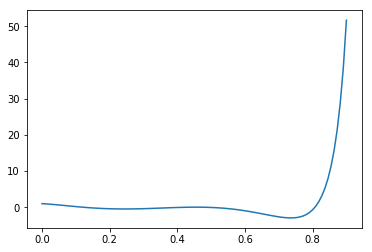

In [29]:
plt.plot(rho_array,diffP_array)

In [30]:
diffP_array

array([ 1.00000000e+00,  9.50996674e-01,  8.92873323e-01,  8.27265243e-01,
        7.55709099e-01,  6.79637643e-01,  6.00377168e-01,  5.19147048e-01,
        4.37060813e-01,  3.55128370e-01,  2.74259044e-01,  1.95265177e-01,
        1.18866107e-01,  4.56923747e-02, -2.37099693e-02, -8.88750217e-02,
       -1.49412730e-01, -2.05004682e-01, -2.55400013e-01, -3.00411462e-01,
       -3.39911580e-01, -3.73829109e-01, -4.02145531e-01, -4.24891783e-01,
       -4.42145142e-01, -4.54026268e-01, -4.60696403e-01, -4.62354710e-01,
       -4.59235757e-01, -4.51607117e-01, -4.39767091e-01, -4.24042531e-01,
       -4.04786768e-01, -3.82377609e-01, -3.57215422e-01, -3.29721272e-01,
       -3.00335116e-01, -2.69514034e-01, -2.37730488e-01, -2.05470599e-01,
       -1.73232427e-01, -1.41524241e-01, -1.10862768e-01, -8.17714039e-02,
       -5.47783709e-02, -3.04148068e-02, -9.21276337e-03,  8.29690237e-03,
        2.15867697e-02,  3.01352527e-02,  3.34291852e-02,  3.09666241e-02,
        2.22599091e-02,  

In [31]:
rho_array=np.linspace(0,0.9,100)
diffP_array = np.zeros(len(rho_array))

for i in range (100000):
    eps=1+i/10
    tmp=0
    print("epsilon\t=\t",eps)
    for j in range (len(rho_array)):
        tmp=diifP.subs({"epsilon0":eps,"rho":rho_array[j]})
        if(tmp<0):
            print("L-V at epsilon>=\t",eps)
            break
    if(tmp<0):
        break

epsilon	=	 1.0
epsilon	=	 1.1
epsilon	=	 1.2
epsilon	=	 1.3
epsilon	=	 1.4
epsilon	=	 1.5
epsilon	=	 1.6
epsilon	=	 1.7
epsilon	=	 1.8
epsilon	=	 1.9
epsilon	=	 2.0
epsilon	=	 2.1
epsilon	=	 2.2
epsilon	=	 2.3
epsilon	=	 2.4
epsilon	=	 2.5
epsilon	=	 2.6
epsilon	=	 2.7
epsilon	=	 2.8
epsilon	=	 2.9
epsilon	=	 3.0
epsilon	=	 3.1
epsilon	=	 3.2
epsilon	=	 3.3
epsilon	=	 3.4
epsilon	=	 3.5
epsilon	=	 3.6
epsilon	=	 3.7
epsilon	=	 3.8
epsilon	=	 3.9
epsilon	=	 4.0
epsilon	=	 4.1
epsilon	=	 4.2
L-V at epsilon>=	 4.2


In [33]:
rho_array=np.linspace(0,0.9,500)
diffP_array = np.zeros(len(rho_array))

for i in range (100000):
    eps=4.1+i/100
    tmp=0
    print("epsilon\t=\t",eps)
    for j in range (len(rho_array)):
        tmp=diifP.subs({"epsilon0":eps,"rho":rho_array[j]})
        if(tmp<0):
            print("L-V at epsilon>=\t",eps)
            print("L-V at rho=\t",rho_array[j])
            break
    if(tmp<0):
        break

epsilon	=	 4.1
epsilon	=	 4.109999999999999
epsilon	=	 4.119999999999999
epsilon	=	 4.13
epsilon	=	 4.14
epsilon	=	 4.1499999999999995
epsilon	=	 4.159999999999999
epsilon	=	 4.17
epsilon	=	 4.18
epsilon	=	 4.1899999999999995
epsilon	=	 4.199999999999999
L-V at epsilon>=	 4.199999999999999
L-V at rho=	 0.22545090180360722
